In [164]:
!pip install pandas

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [166]:
df = pd.read_csv("cardio_train.csv", delimiter=';', nrows=None)

In [167]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [168]:
df.shape

(70000, 13)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<Axes: xlabel='cardio'>

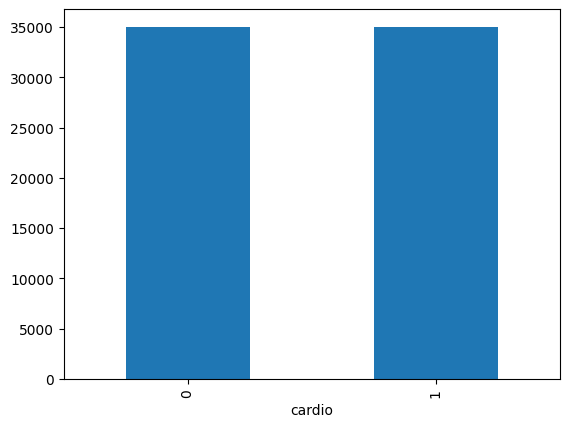

In [170]:
df['cardio'].value_counts().plot(kind="bar")

In [171]:
pd.crosstab(df.cardio, df.gender)

gender,1,2
cardio,,
0,22914,12107
1,22616,12363


In [172]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

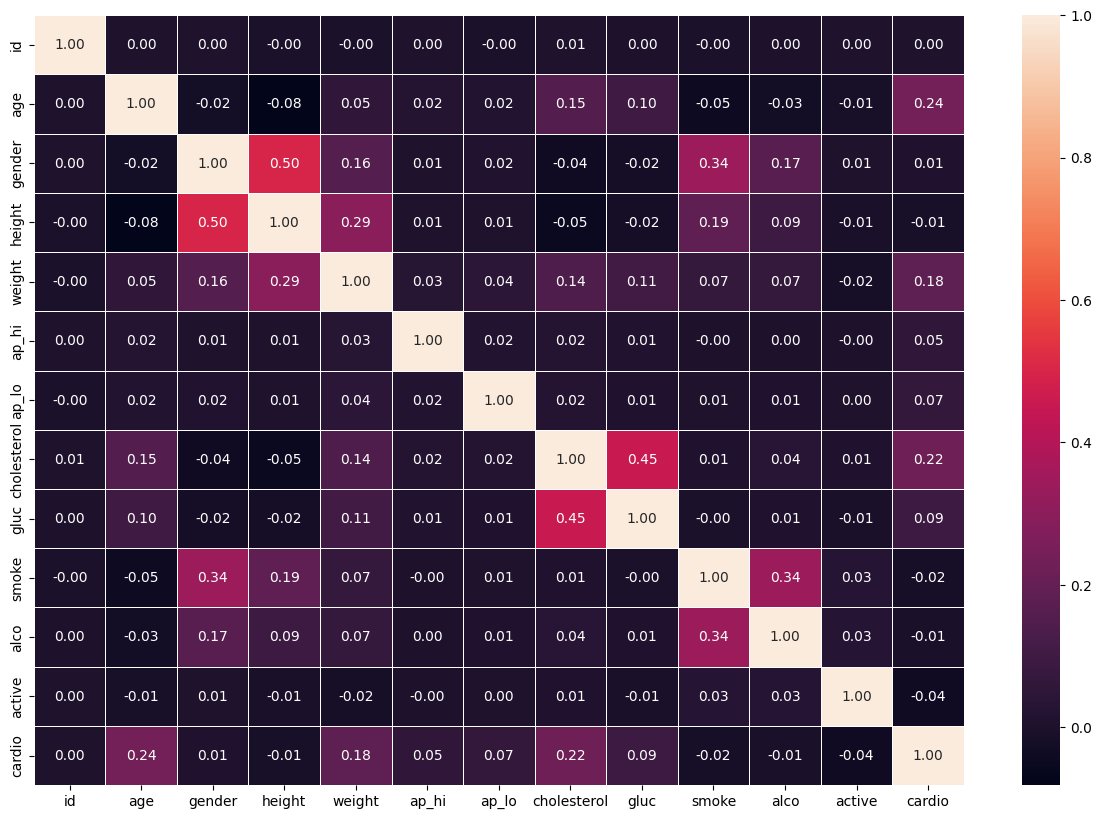

In [173]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f')

In [174]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [175]:
df[df['ap_hi'] > 1000].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
13895,19827,15996,1,168,72.0,1500,80,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1


In [176]:
df['age_in_years'] = (df['age'] / 365).astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [177]:
df.drop('age', axis=1, inplace=True)

In [178]:
df[df['ap_lo'] > 200].head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
228,314,2,183,98.0,160,1100,1,2,1,0,1,1,47
241,334,2,157,60.0,160,1000,2,1,0,0,0,1,60
260,357,1,150,83.0,140,800,1,1,0,0,1,1,49
329,458,1,176,63.0,160,1000,2,2,0,0,0,1,64
345,482,1,154,81.0,140,1000,2,1,0,0,1,1,51


In [179]:
new_df = df[(df['ap_hi'] < 300) & (df['ap_hi'] > 50)]

In [180]:
new_df.shape

(69772, 13)

<Axes: xlabel='ap_hi', ylabel='Density'>

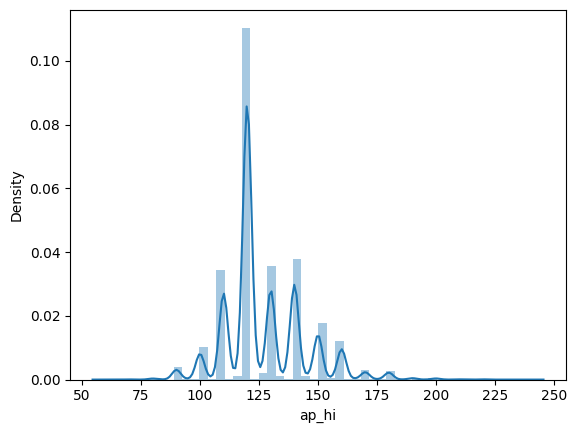

In [181]:
sns.distplot(new_df['ap_hi'])

<Axes: xlabel='ap_hi'>

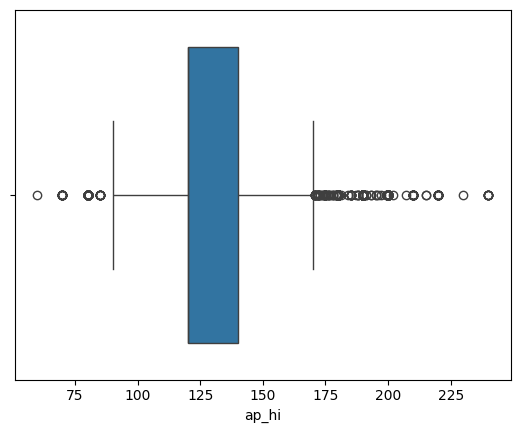

In [182]:
sns.boxplot(x=new_df['ap_hi'])

In [183]:
percent25_ap_hi = df['ap_hi'].quantile(0.25)
percent75_ap_hi = df['ap_hi'].quantile(0.75)

In [184]:
iqr_ap_hi = percent75_ap_hi - percent25_ap_hi
iqr_ap_hi

np.float64(20.0)

In [185]:
upper_ap_hi = percent75_ap_hi + 1.5*iqr_ap_hi
lower_ap_hi = percent25_ap_hi - 1.5*iqr_ap_hi
upper_ap_hi
lower_ap_hi

np.float64(90.0)

## Lets do capping

In [186]:
new_df['ap_hi'] = np.where(
new_df['ap_hi'] > upper_ap_hi,
upper_ap_hi,
np.where(new_df['ap_hi'] < lower_ap_hi,
        lower_ap_hi,
        new_df['ap_hi']))

<Axes: xlabel='ap_hi'>

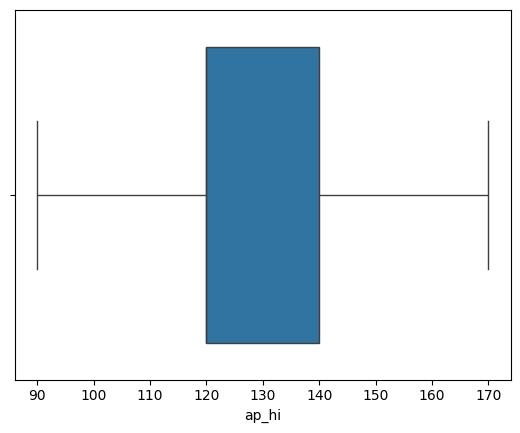

In [187]:
sns.boxplot(x=new_df['ap_hi'])

In [188]:
# new_df = new_df[new_df['ap_lo'] < 250]

In [189]:
new_df = new_df[new_df['ap_lo'] < 250]

<Axes: xlabel='ap_lo'>

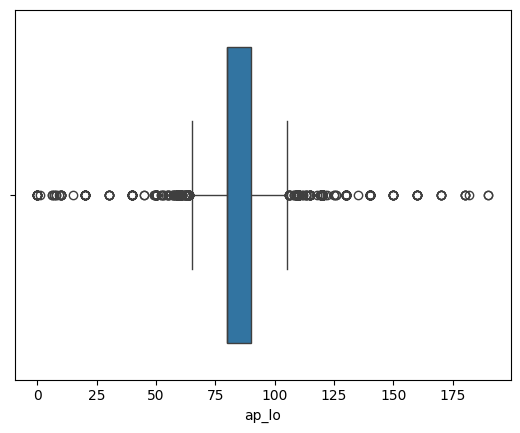

In [190]:
sns.boxplot(x=new_df['ap_lo'])

In [191]:
percent25_ap_lo = df['ap_lo'].quantile(0.25)
percent75_ap_lo = df['ap_lo'].quantile(0.75)

In [192]:
iqr_ap_lo = percent75_ap_lo - percent25_ap_lo
iqr_ap_lo

np.float64(10.0)

In [193]:
upper_ap_lo = percent75_ap_lo + 1.5*iqr_ap_lo
lower_ap_lo = percent25_ap_lo - 1.5*iqr_ap_lo
upper_ap_lo
lower_ap_lo

np.float64(65.0)

In [194]:
new_df['ap_lo'] = np.where(
new_df['ap_lo'] > upper_ap_lo,
upper_ap_lo,
np.where(new_df['ap_lo'] < lower_ap_lo,
        lower_ap_lo,
        new_df['ap_lo']))

<Axes: xlabel='ap_lo'>

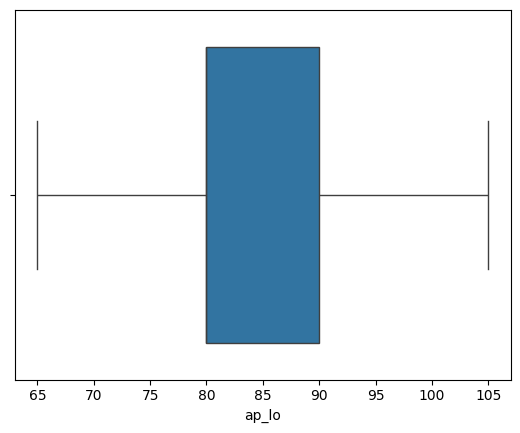

In [195]:
sns.boxplot(x=new_df['ap_lo'])

In [196]:
new_df.shape

(68822, 13)

In [197]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68822 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            68822 non-null  int64  
 1   gender        68822 non-null  int64  
 2   height        68822 non-null  int64  
 3   weight        68822 non-null  float64
 4   ap_hi         68822 non-null  float64
 5   ap_lo         68822 non-null  float64
 6   cholesterol   68822 non-null  int64  
 7   gluc          68822 non-null  int64  
 8   smoke         68822 non-null  int64  
 9   alco          68822 non-null  int64  
 10  active        68822 non-null  int64  
 11  cardio        68822 non-null  int64  
 12  age_in_years  68822 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 7.4 MB


<Axes: ylabel='Density'>

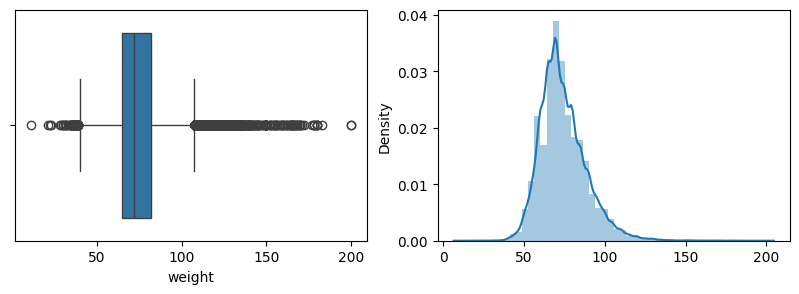

In [198]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['weight'])

plt.subplot(1, 2, 2)
sns.distplot(x=new_df['weight'])

In [199]:
new_df[new_df['weight'] > 150].shape

(56, 13)

In [200]:
print("highest allowed", new_df['weight'].mean() + 3*new_df['weight'].std())
print("lowest allowed", new_df['weight'].mean() - 3*new_df['weight'].std())

highest allowed 117.11550230582941
lowest allowed 31.12623725419497


In [201]:
new_df[(new_df['weight'] > 118) | (new_df['weight'] < 32)].head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
338,474,1,157,142.0,120.0,80.0,1,1,0,0,1,1,57
389,552,2,165,169.0,120.0,80.0,1,1,0,0,1,0,45
435,618,1,186,200.0,130.0,70.0,1,1,0,0,0,0,45
446,634,2,178,120.0,160.0,90.0,1,3,0,0,1,1,58
591,846,1,164,125.0,130.0,90.0,1,1,0,0,0,0,40


In [202]:
new_df = new_df[(new_df['weight'] < 118) & (new_df['weight'] > 32)]

In [203]:
new_df.shape

(68147, 13)

<Axes: ylabel='Density'>

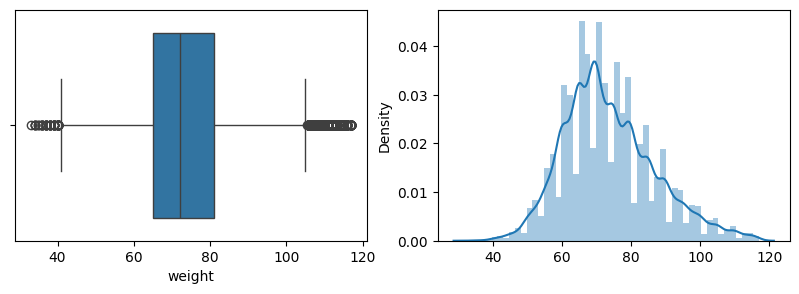

In [204]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['weight'])

plt.subplot(1, 2, 2)
sns.distplot(x=new_df['weight'])

In [205]:
print("highest allowed", new_df['weight'].mean() + 3*new_df['weight'].std())
print("lowest allowed", new_df['weight'].mean() - 3*new_df['weight'].std())

highest allowed 113.24589908109425
lowest allowed 33.93109770526462


In [206]:
new_df = new_df[(new_df['weight'] < 113) & (new_df['weight'] > 33)]

In [207]:
new_df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,0,2,168,62.0,110.0,80.0,1,1,0,0,1,0,50
1,1,1,156,85.0,140.0,90.0,3,1,0,0,1,1,55
2,2,1,165,64.0,130.0,70.0,3,1,0,0,0,1,51
3,3,2,169,82.0,150.0,100.0,1,1,0,0,1,1,48
4,4,1,156,56.0,100.0,65.0,1,1,0,0,0,0,47


In [208]:
new_df['BMI'] = (new_df['weight'] / (new_df['height']/100)**2).astype(int)

In [209]:
new_df = new_df[new_df['BMI'] < 50]

<Axes: ylabel='Density'>

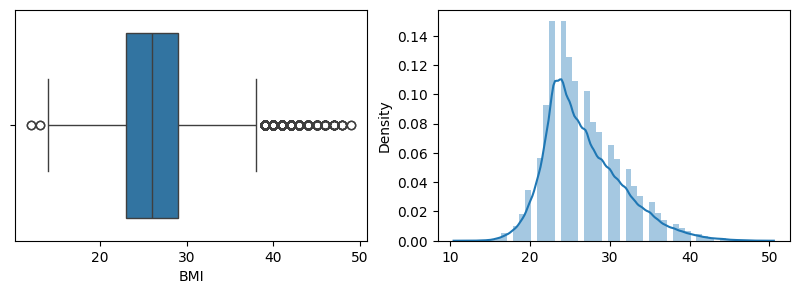

In [210]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['BMI'])

plt.subplot(1, 2, 2)
sns.distplot(x=new_df['BMI'])

In [211]:
percent25_bmi = new_df['BMI'].quantile(0.25)
percent75_bmi = new_df['BMI'].quantile(0.75)

In [212]:
iqr_bmi = percent75_bmi - percent25_bmi
iqr_bmi

np.float64(6.0)

In [213]:
upper_bmi = percent75_bmi + 1.5*iqr_bmi
lower_bmi = percent25_bmi - 1.5*iqr_bmi
upper_bmi, lower_bmi

(np.float64(38.0), np.float64(14.0))

In [214]:
new_df['BMI'] = np.where(
    new_df['BMI'] > upper_bmi,
    upper_bmi,
    np.where(
    new_df['BMI'] < lower_bmi,
    lower_bmi,
    new_df['BMI']))

<Axes: ylabel='Density'>

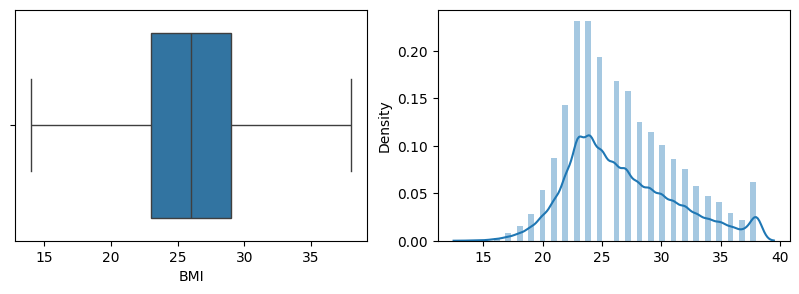

In [215]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['BMI'])

plt.subplot(1, 2, 2)
sns.distplot(x=new_df['BMI'])

In [216]:
unused_columns = ['id', 'gender', 'height', 'active', 'alco']
unused_df = df[unused_columns]

In [217]:
new_df.drop(unused_columns, axis=1, inplace=True)

In [136]:
new_df

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,cardio,age_in_years,BMI
0,62.0,110.0,80.0,1,1,0,0,50,21.0
1,85.0,140.0,90.0,3,1,0,1,55,34.0
2,64.0,130.0,70.0,3,1,0,1,51,23.0
3,82.0,150.0,100.0,1,1,0,1,48,28.0
4,56.0,100.0,65.0,1,1,0,0,47,23.0
...,...,...,...,...,...,...,...,...,...
69994,80.0,150.0,80.0,1,1,0,1,57,29.0
69995,76.0,120.0,80.0,1,1,1,0,52,26.0
69997,105.0,170.0,90.0,3,1,0,1,52,31.0
69998,72.0,135.0,80.0,1,2,0,1,61,27.0


In [218]:
from sklearn.compose import ColumnTransformer
numeric_features = ['weight', 'ap_hi', 'ap_lo', 'age_in_years', 'BMI']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # Keep other columns as is
)

In [219]:
new_df

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,cardio,age_in_years,BMI
0,62.0,110.0,80.0,1,1,0,0,50,21.0
1,85.0,140.0,90.0,3,1,0,1,55,34.0
2,64.0,130.0,70.0,3,1,0,1,51,23.0
3,82.0,150.0,100.0,1,1,0,1,48,28.0
4,56.0,100.0,65.0,1,1,0,0,47,23.0
...,...,...,...,...,...,...,...,...,...
69994,80.0,150.0,80.0,1,1,0,1,57,29.0
69995,76.0,120.0,80.0,1,1,1,0,52,26.0
69997,105.0,170.0,90.0,3,1,0,1,52,31.0
69998,72.0,135.0,80.0,1,2,0,1,61,27.0


## Spliting data

In [220]:
x = new_df.drop("cardio", axis=1)
y = new_df['cardio']

In [225]:
x_transformed = preprocessor.fit_transform(x)

In [242]:
transformed_columns = numeric_features + [col for col in x.columns if col not in numeric_features]
x_transformed_df = pd.DataFrame(x_transformed, columns=transformed_columns)

In [248]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed_df, y, test_size=0.2, random_state=0)
x_train.shape, y_train.shape

((54162, 8), (54162,))

In [249]:
X_transformed_df.head()

,weight,ap_hi,ap_lo,age_in_years,BMI,cholesterol,gluc,smoke
0,-0.880582,-1.020724,-0.159214,-0.418413,-1.227176,1.0,1.0,0.0
1,0.901602,0.863799,0.995440,0.320322,1.601369,3.0,1.0,0.0
2,-0.725609,0.235624,-1.313869,-0.270666,-0.792015,3.0,1.0,0.0
3,0.669144,1.491973,2.150095,-0.713907,0.295887,1.0,1.0,0.0
4,-1.345499,-1.648898,-1.891196,-0.861654,-0.792015,1.0,1.0,0.0


In [250]:
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [251]:
from sklearn.compose import ColumnTransformer

In [252]:
# Now converting the scaled data into dataframe instead of numpy arra
# x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
# x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns) 

In [253]:
x_train

,weight,ap_hi,ap_lo,age_in_years,BMI,cholesterol,gluc,smoke
51098,-0.880582,-0.769454,-0.967472,0.024828,-0.356855,3.0,1.0,0.0
51501,0.359199,0.235624,0.995440,-0.122919,0.731047,1.0,1.0,0.0
13301,-0.648123,2.748321,2.727422,-0.566160,-0.792015,1.0,1.0,1.0
45869,-0.803096,-0.392550,-0.159214,0.320322,-0.792015,1.0,1.0,0.0
65008,-1.113041,-0.392550,-0.159214,0.320322,-0.792015,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
41993,-0.493150,0.235624,-0.159214,-0.270666,-0.356855,3.0,3.0,0.0
21243,-0.880582,1.491973,0.879975,-0.713907,-0.792015,1.0,1.0,0.0
45891,-0.415664,-1.020724,-1.313869,0.320322,-0.356855,1.0,1.0,0.0
42613,1.908924,-1.020724,-0.159214,-0.713907,1.818949,1.0,2.0,0.0


In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [255]:
# models = {"Logistic Regression" : LogisticRegression(),
#          "KNN" : KNeighborsClassifier(),
#          "Random Forest" : RandomForestClassifier()}

# # Create a function to fit and score models
# def fit_and_score(models, x_train, x_test, y_train, y_test):
#     np.random.seed(42)
#     model_scores = {}
#     for name, model in models.items():
#         model.fit(x_train, y_train)
#         model_scores[name] = model.score(x_test, y_test)
#     return model_scores
# scores = fit_and_score(models, x_train_scaled, x_test_scaled, y_train, y_test)
# scores
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model = XGBClassifier( objective='multi:softmax',  # Specify the objective for classification
    num_class=3,                # Number of classes (for multiclass classification)
    learning_rate=0.1,
    max_depth=5,
    n_estimators=50)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [256]:
predicted = model.predict(x_test)
accuracy_score(y_test, predicted)

0.7335499593826158

In [145]:
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(x_train_scaled, y_train)
preds = model.predict(x_test_scaled)
accuracy_score(y_test, preds)


0.7277829747427502

In [146]:
preds[2]

np.int64(1)

In [258]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

np.random.seed(42)

# Setup random hyperparamer search for logisticregression
xg_log_reg = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model
xg_log_reg.fit(x_train, y_train)
xg_log_reg

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None, n_estimators=50,
                                           n_jobs=None, num_class=3,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=True)

In [259]:
xg_log_reg.score(x_test, y_test)

0.7329591610663909

In [260]:
from scipy.special import expit
user_data = {
    "weight" : 32,
    "ap_hi" : 130,
    "ap_lo" : 70,
    "cholesterol" : 1,
    "gluc" : 1,
    "smoke" : 0,
    "alco" : 1,
    "active" : 1,
    "age_in_years" : 40,
    "BMI" : 35
}

# Convert to DataFrame
user_df = pd.DataFrame([user_data])

# Ensure the order of columns matches the training data
user_df = user_df[['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_in_years', 'BMI']]
user_df
user_df_scaled = scaler.transform(user_df)

# Predict probability
probabilities = rs_log_reg.decision_function(user_df_scaled)
print(expit(probabilities))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- active
- alco


In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=model, X=x_test, y=y_test);